In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cheats, Suckers, and Grudgers

In Dawkins' [The Selfish Gene](https://en.wikipedia.org/wiki/The_Selfish_Gene) chapter on reciprocal altruism, he describes a simulation between cheats and suckers. 

## The scenario

There are a population of entities and they have a parasite sucking their blood on their head.

The entity will live if another entity helps them and removes the parasite from their comrad. However, if not removed, it will die.

`Cheats` will let `Suckers` remove their parasite, but when the `Sucker` is in need of help, the `Cheats` will not help.

Hence the naming. No one likes `Cheats` (this says something about how we evolved that I have this opinion)

## The sad conclusion  

In a population with just `Cheats` and `Suckers`, the `Cheats` will always win. The `Suckers` will die out.


In [57]:
class Strategy:
    def __init__(self, numExist: int):
        self.numExist = numExist
        self.history = []
        self.grudge = False
    def record(self):
        self.history.append(self.numExist)
    def __repr__(self):
        return f"{self.__class__.__name__}({self.numExist})"
    def interact(self, other:"Strategy"):
        pass
    def help(self, other: "Strategy"):
        other.numExist += 1
        self.grudge = False
    def ignore(self, other: "Strategy"):
        other.numExist -= 1
        self.grudge = True

class Cheat(Strategy):
    def __init__(self, numExist: int):
        super().__init__(numExist)
    def interact(self, other):
        self.ignore(other)

class Sucker(Strategy):
    def __init__(self, numExist: int):
        super().__init__(numExist)
    def interact(self, other):
        self.help(other)

In [29]:
n = 100
population = [Cheat(n//2), Sucker(n//2)]
def simulate(n_iter, population: list[Strategy], plot_output=True):
	def iterate():
		for _ in range(n_iter):
			entity = np.random.choice(population)
			entity_with_parasite = np.random.choice(population)

			entity.interact(entity_with_parasite)

			for strategy in population:
				strategy.record()
				if strategy.numExist == 0:
					print(strategy.__class__.__name__, "is extinct after", len(strategy.history), "iterations")
					return

	iterate()	
 	
	if plot_output:
		xs = list(range(len(population[0].history)))
		for option in population:
			plt.plot(xs, option.history, label=option.__class__.__name__)
		plt.legend()
		plt.show()

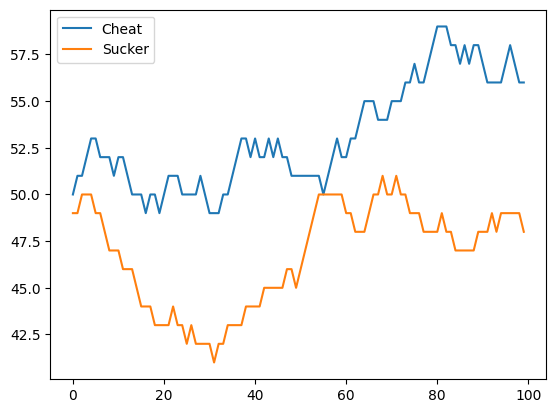

In [23]:
simulate(100, population)

Sucker is extinct after 2338 iterations


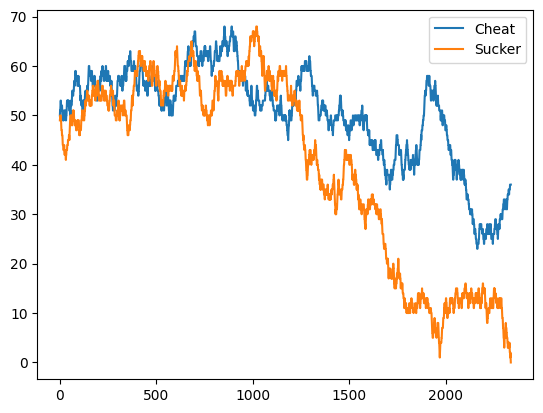

In [24]:
# what about for as n -> alot?
simulate(1_000_000, population)

In the book, it said a `Sucker` proportion of 90% would be ESS 

In [25]:
population = [Sucker(90), Cheat(10)]

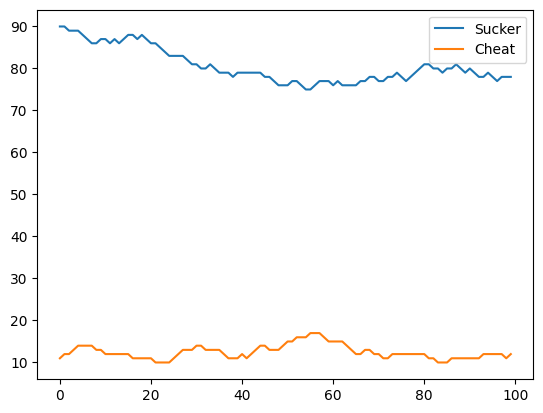

In [26]:
simulate(100, population)

Cheat is extinct after 7975 iterations


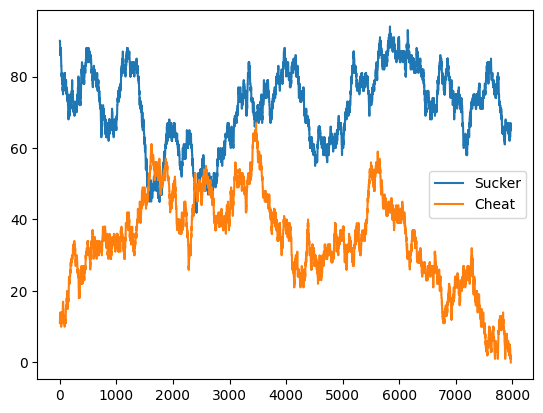

In [27]:
# run it for some time
simulate(1_000_000, population)

## Introduction of the `Grudger`

Or also known as tit for tat. The `Grudger` acts like a human would. It will start out with a `Sucker` action, but if it is ever cheated, it will retaliate with a `Cheater` action the next time it encounters an entity, then go back to `Sucker` action.

This is like if someone harms you, retaliate, but if they don't harm you, don't retaliate.

In [56]:
class Grudger(Strategy):
    def __init__(self, numExist: int):
        super().__init__(numExist)

        # the grudge memory
        self.grudge = False

    def interact(self, other: Strategy):
        if self.grudge:
            self.ignore(other)
        else:
            self.help(other)

In [58]:
population = [Sucker(10), Cheat(10), Grudger(10)]

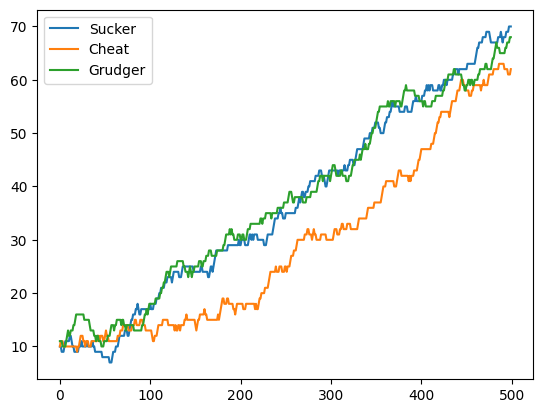

In [59]:
simulate(500, population)

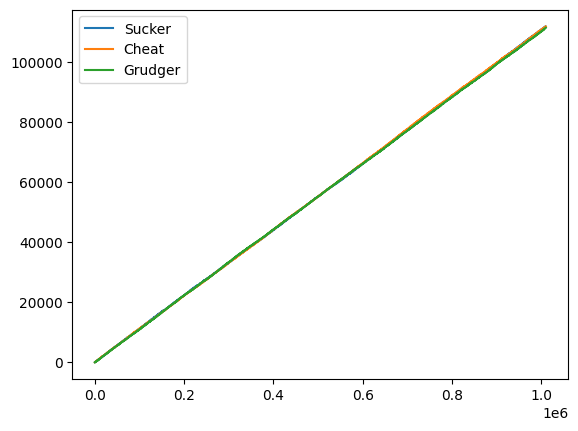

In [61]:
simulate(1_000_000, population)

What about a population with mostly `Cheats` and some `Grudgers`?

In [62]:
population = [Cheat(90), Grudger(10)]

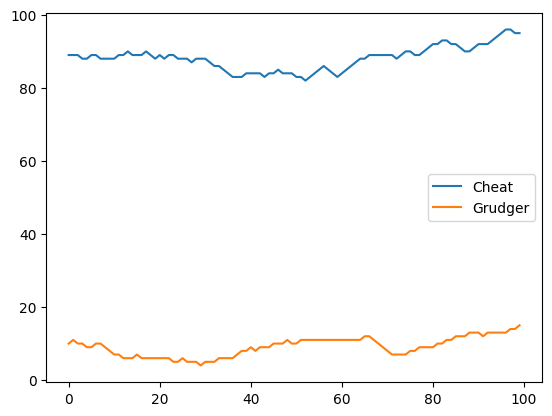

In [63]:
simulate(100, population)

Grudger is extinct after 1102 iterations


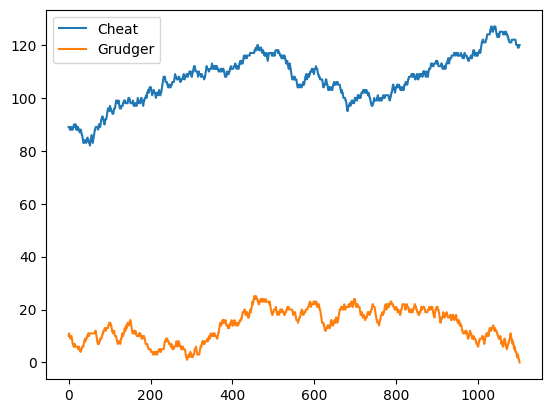

In [65]:
simulate(1_000_000, population)

In [83]:
population = [Cheat(1_000), Grudger(1_000)]

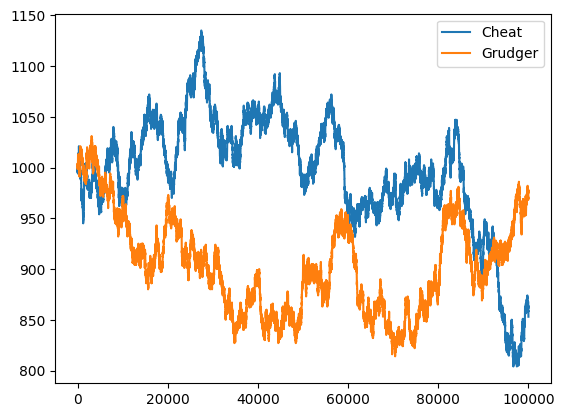

In [84]:
simulate(100_000, population)